In [1]:
from openGAVY.preprocess import *
from openGAVY.ETL import *
from openGAVY.visualization import *
from openGAVY.metric import *
from openGAVY.modelling import *

## Initializing the required classes

In [2]:
ob_ETL = ETL()
ob_preprocessing = preprocess()
ob_viz = visualization()
ob_modelling = modelling()

ETL METHODS LOADED..
PRE-PROCESSING METHODS LOADED..

In Visulaization
Welcome to [MODELLING]



### LOADING THE DATASET OR WRITING THE DATASET INTO DIFFERENT FILES

Pass the  location of data to be read of any format of type .csv, .xlsx

You may also enter the specific columns to be read and also the delimiter if any exist in the data.

open.read_csv(loc, columns, delim){

     loc : Location of the data(No default value : Required Entry)

     columns : Specific columns to be selected(Default Value : None, that means select all : Not required)

     delim : Delimiter to separate data (Default Value : None, that means None: Not required)

     return data ( Data in the form of DataFrame will be Returned from this function)
}

In [3]:
data_all = ob_ETL.gavy_read_csv("./unit_test.csv")
data_regress = ob_ETL.gavy_read_csv("./kc_house_data.csv")
data_all = data_all.drop(data_all.columns[0], axis = 1)

*** Read and write files of format ./csv and ./xls ***
*** Read and write files of format ./csv and ./xls ***


## Use this function to handle the column with type string 
Input:
    data: the dataframe 

Output:
    data: No string features

### Example:
    #data  = gavy_string_to_categry(data)
        

In [4]:
data_all = ob_preprocessing.gavy_string_to_categry(data_all)
data = data_all.copy()

*** String to Category ***


### HANDLING THE NULL VALUES WITHIN THE DATA

Imputes null values from the data. User has various options for imputation mean, mode, median and also constant.

impute_missing_values(self, data, method, constant = -1, feature_list = 0){

    data : data received from the read function of OpenGavy
    method : can impute with mean, mode, median and constant values of a particular feature
    constant : if method is constant, value of constant to be taken can also be passes.
    feature_list : 
        if passes 0 doesn't return any feature else return list of features imputed.
            return feature_list and imputed_data if feature_list is not 0.
        else 
            return imputed_data
}

In [5]:
data_all, feature_list = ob_preprocessing.gavy_impute_missing_values(data_all, 'mean', feature_list = 1)
data_regress, feature_list = ob_preprocessing.gavy_impute_missing_values(data_regress,'mean',feature_list = 1)

***	Fill missing values with mean/median/mode/constant: impute_missing_values ***
***	Fill missing values with mean/median/mode/constant: impute_missing_values ***


## STANDARIZATION of FEATURES
Function standarizes the features on the basis of three method Standard Scaling, Min-max Scaling and about mean 

Input:
    # data: the dataframe before splitting
    # method = Method on which the standarization is to be done.
            {'mean_std', 'min_max', 'standard_scaler'}
Output
    # data_std : Data after Standarization.
    # features_standardized : List of features Standarized.

In [6]:
data_1, features = ob_ETL.gavy_standarization(
    data.drop('TARGET', axis = 1), 
    method = 'mean_std'
)

data = pd.concat([
    data_1, 
    data.loc[:,'TARGET']
], axis = 1)

data_regress, features = ob_ETL.gavy_standarization(
    data_regress, 
    method = 'mean_std'
)

Standardizing features...

Please wait while the system is Standarizing Features...
Feature Standarization completed
Standardizing features...

Please wait while the system is Standarizing Features...
Feature Standarization completed


### BINNING THE DATA
Function performs binnning the data group various features together

Input:
        # data: the dataframe before splitting
        # target_var : The Target variable
        # threshold_unique : Default value :20
        # max_depth : default value : 1
        # min_sample_leaf : default value : 200 

Output
        # data_binned : Data after Binning.
        # col_names_continuous : List of all the columns which are continuous.
        # dictionary_threshold : dictionary of list of all the features along with their thresholds for binning.

In [7]:
data_binned, col_name_continuos, dictionary_threshold = ob_preprocessing.gavy_binning_data(
    data, 
    'TARGET', 
    threshol_unique =20, 
    tuning = 0, 
    max_depth = 10, 
    min_sample_leaf = 200
)

*** Starting Binning Data.. ***
	Binning Completed


In [9]:
data_binned

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,1,0,0,7,1,4,1,1,...,0.000232,0.013595,-0.001004,-0.006586,0.012510,-0.616240,-0.614095,-0.363035,-3.100539e-01,0.622547
1,0,1,1,1,0,7,7,4,1,1,...,0.000232,0.013595,-0.001004,-0.006586,0.012510,2.170496,2.192953,-0.647345,-3.100539e-01,-0.518819
2,0,0,0,1,0,7,7,4,1,1,...,0.000232,-0.630638,-0.001004,-0.006586,-0.263456,-0.616240,-0.614095,-0.647345,8.352822e-01,-0.518819
3,0,1,1,1,1,7,7,4,1,1,...,0.000232,0.013595,-0.001004,-0.006586,0.012510,1.120465,1.137690,-1.014131,-3.100539e-01,-1.089502
4,0,1,1,1,0,7,7,4,1,1,...,0.000232,0.013595,-0.001004,-0.006586,0.012510,-0.616240,-0.614095,-1.014131,-2.994567e-14,0.028568
5,0,0,0,1,0,2,7,4,0,1,...,0.000232,0.013595,-0.001004,-0.006586,0.012510,-0.616240,-0.614095,0.428414,-3.100539e-01,-0.518819
6,0,1,1,1,0,2,7,4,1,1,...,0.000232,0.013595,-0.001004,-0.006586,0.012510,-0.616240,-0.614095,-0.363035,-3.100539e-01,0.028568
7,0,0,0,0,0,7,7,4,1,1,...,0.000232,0.013595,-0.001004,-0.006586,0.012510,-0.616240,-0.614095,-1.014131,8.352822e-01,-1.089502
8,0,0,0,0,0,7,7,4,1,1,...,0.000232,0.013595,-0.001004,-0.006586,0.012510,0.243431,0.252816,0.778389,-3.100539e-01,-0.518819
9,0,1,1,1,0,7,1,1,1,1,...,-1.581463,-1.161024,-0.321652,-0.561188,-1.138763,-0.616240,-0.614095,1.134400,-3.100539e-01,-0.518819


### Information Value
Function performs binnning the data group various features together

Input:
        # data: the dataframe before splitting
        # target : The Target variable
        # iv_lower_bound : Default value : 0.02 {All values below this will be rejected}
        # iv_higher_bound : default value : 10 {All values above this will be accepted}

Output
        # data_info_values : Data after Binning.
        # iv_columns : List of all the columns which are continuous.

In [10]:
data_iv, iv_columns = ob_preprocessing.gavy_information_values(
    data_binned, 
    'TARGET', 
    iv_lower_bound = 0.02, 
    iv_higher_bound = 10
)

***Starting information value computation***
***Computing IV completed***


In [11]:
data_iv

,No of Bins,IV,variable,Use_Case
0,,,,
TARGET,2,40.000000,TARGET,Rejected
EXT_SOURCE_3,10,0.345352,EXT_SOURCE_3,Considered
EXT_SOURCE_2,10,0.322033,EXT_SOURCE_2,Considered
EXT_SOURCE_1,10,0.141073,EXT_SOURCE_1,Considered
DAYS_EMPLOYED,10,0.123068,DAYS_EMPLOYED,Considered
OCCUPATION_TYPE,19,0.097797,OCCUPATION_TYPE,Considered
DAYS_BIRTH,10,0.083945,DAYS_BIRTH,Considered
NAME_EDUCATION_TYPE,5,0.070938,NAME_EDUCATION_TYPE,Considered
AMT_GOODS_PRICE,10,0.064389,AMT_GOODS_PRICE,Considered


### Checking the cross tabs

In [12]:
ob_preprocessing.gavy_crosstab(data_binned)

NAME_CONTRACT_TYPE         0         1       All
TARGET                                          
0                   0.827960  0.091313  0.919272
1                   0.075460  0.005268  0.080728
All                 0.903419  0.096581  1.000000
CODE_GENDER         0         1       All
TARGET                                   
0            0.612539  0.306733  0.919272
1            0.045510  0.035218  0.080728
All          0.658049  0.341951  1.000000
FLAG_OWN_CAR         0         1       All
TARGET                                    
0             0.604084  0.315188  0.919272
1             0.056306  0.024422  0.080728
All           0.660391  0.339609  1.000000
FLAG_OWN_REALTY         0         1       All
TARGET                                       
0                0.281840  0.637432  0.919272
1                0.025674  0.055054  0.080728
All              0.307513  0.692487  1.000000
CNT_CHILDREN         0         1         2         3         4         5  \
TARGET                  

REGION_RATING_CLIENT         0         1         2       All
TARGET                                                      
0                     0.100971  0.676926  0.141375  0.919272
1                     0.004975  0.058778  0.016975  0.080728
All                   0.105946  0.735704  0.158350  1.000000
REGION_RATING_CLIENT_W_CITY         0         1         2       All
TARGET                                                             
0                            0.107084  0.684454  0.127734  0.919272
1                            0.005349  0.059542  0.015837  0.080728
All                          0.112434  0.743996  0.143570  1.000000
WEEKDAY_APPR_PROCESS_START         0         1         2         3         4  \
TARGET                                                                         
0                           0.152480  0.150383  0.100808  0.049120  0.150611   
1                           0.012455  0.012845  0.008926  0.004032  0.013918   
All                         0.16493

FLAG_DOCUMENT_11         0         1       All
TARGET                                        
0                 0.915630  0.003642  0.919272
1                 0.080565  0.000163  0.080728
All               0.996195  0.003805  1.000000
FLAG_DOCUMENT_12         0       All
TARGET                              
0                 0.919272  0.919272
1                 0.080728  0.080728
All               1.000000  1.000000
FLAG_DOCUMENT_13         0         1       All
TARGET                                        
0                 0.915972  0.003301  0.919272
1                 0.080614  0.000114  0.080728
All               0.996586  0.003414  1.000000
FLAG_DOCUMENT_14         0         1       All
TARGET                                        
0                 0.916785  0.002488  0.919272
1                 0.080598  0.000130  0.080728
All               0.997382  0.002618  1.000000
FLAG_DOCUMENT_15         0         1       All
TARGET                                        
0               

AMT_CREDIT  -1.1137665660686586  -0.7796141679846732  -0.27780575856518147  \
TARGET                                                                       
0                      0.121360             0.224688              0.175243   
1                      0.009788             0.021072              0.019869   
All                    0.131148             0.245760              0.195112   

AMT_CREDIT  0.12636506116026427  0.5800449540466837  1.1854087889798681  \
TARGET                                                                    
0                      0.109767            0.123587            0.083785   
1                      0.010422            0.010016            0.005642   
All                    0.120189            0.133603            0.089427   

AMT_CREDIT  1.736926583000649  2.285580645951724  3.0868985198191656  \
TARGET                                                                 
0                    0.039169           0.021901            0.015560   
1                

OWN_CAR_AGE  -1.418307954428877  -0.7791875138879855  -0.3616628561976598  \
TARGET                                                                      
0                      0.076159             0.071184             0.029413   
1                      0.004878             0.004504             0.002293   
All                    0.081037             0.075687             0.031706   

OWN_CAR_AGE  0.0004172894352153736  0.4866870364587508  1.0110858546082175  \
TARGET                                                                       
0                         0.643725            0.043347            0.016942   
1                         0.059493            0.004358            0.001658   
All                       0.703218            0.047705            0.018601   

OWN_CAR_AGE  1.5320013419005982  2.146201974422792  2.9956213734383583  \
TARGET                                                                   
0                      0.015137           0.008471            0.004244   
1

YEARS_BEGINEXPLUATATION_AVG  -13.971993275857807  -0.6171090648855782  \
TARGET                                                                  
0                                       0.003073             0.008260   
1                                       0.000179             0.000634   
All                                     0.003252             0.008894   

YEARS_BEGINEXPLUATATION_AVG  -0.27292446950536303  -0.10792380634205125  \
TARGET                                                                    
0                                        0.019706              0.071346   
1                                        0.001854              0.006065   
All                                      0.021560              0.077411   

YEARS_BEGINEXPLUATATION_AVG  -0.00028768202653233496  0.07979633670064824  \
TARGET                                                                      
0                                           0.527340             0.070566   
1                          

LIVINGAPARTMENTS_AVG  -1.5817504410895868  -0.843746221896566  \
TARGET                                                          
0                                0.049819            0.092776   
1                                0.004813            0.006618   
All                              0.054631            0.099394   

LIVINGAPARTMENTS_AVG  -0.3685879321287516  -0.00012519991772175795  \
TARGET                                                               
0                                0.038096                 0.649367   
1                                0.002488                 0.060891   
All                              0.040583                 0.710258   

LIVINGAPARTMENTS_AVG  0.37842724904159347  0.869896154089478  \
TARGET                                                         
0                                0.021853           0.019544   
1                                0.001528           0.001528   
All                              0.023381           0.021072   

LI

COMMONAREA_MODE  -0.9325500552758426  -0.6222244532274201  \
TARGET                                                      
0                           0.096532             0.063412   
1                           0.007691             0.004666   
All                         0.104223             0.068078   

COMMONAREA_MODE  -0.2802140420136692  0.001267708152926991  \
TARGET                                                       
0                           0.029641              0.663935   
1                           0.002016              0.062111   
All                         0.031657              0.726046   

COMMONAREA_MODE  0.4762807565350943  1.2590680592327606  2.503684619388936  \
TARGET                                                                       
0                          0.023348            0.020373           0.012195   
1                          0.001691            0.001252           0.000634   
All                        0.025039            0.021625           0.012

NONLIVINGAPARTMENTS_MODE  -0.3106651721758402  -0.16003091891605056  \
TARGET                                                                
0                                    0.179422              0.043071   
1                                    0.013544              0.002959   
All                                  0.192966              0.046030   

NONLIVINGAPARTMENTS_MODE  -0.00026982006947517327  0.1412375876033982  \
TARGET                                                                  
0                                        0.653236            0.010926   
1                                        0.061363            0.000764   
All                                      0.714599            0.011690   

NONLIVINGAPARTMENTS_MODE  0.34570998617512794  0.5892779306323229  \
TARGET                                                              
0                                    0.012260            0.003902   
1                                    0.000797            0.000260   
Al

ENTRANCES_MEDI  -1.6612725939940969  -1.1633192428835055  -0.6792232887963363  \
TARGET                                                                          
0                          0.047477             0.073590             0.065314   
1                          0.004000             0.006601             0.004731   
All                        0.051477             0.080191             0.070045   

ENTRANCES_MEDI  -0.033933542299686655  0.3254912494983957  0.8163330876212892  \
TARGET                                                                          
0                            0.573419            0.029673            0.062436   
1                            0.054794            0.002049            0.004325   
All                          0.628213            0.031722            0.066761   

ENTRANCES_MEDI  1.7364562741411314  3.1647877415809313  4.729956269661788  \
TARGET                                                                      
0                         0.045673

TOTALAREA_MODE  -1.1387632917882737  -0.6194911390069181  -0.2634558904338034  \
TARGET                                                                          
0                          0.099979             0.159781             0.048014   
1                          0.009902             0.011284             0.003723   
All                        0.109881             0.171065             0.051737   

TOTALAREA_MODE  0.012510183059213866  0.6539013884239137  1.0888489471860656  \
TARGET                                                                         
0                           0.494382            0.029608            0.026454   
1                           0.048746            0.001902            0.001707   
All                         0.543128            0.031511            0.028161   

TOTALAREA_MODE  1.8194085801041784  3.1732687890822717  5.013576833844039  \
TARGET                                                                      
0                         0.033982     

### PARTIONING THE DATASET
Use this function to partition the dataset into train and test parts 

Input:
    #data: the dataframe
    #target_var: The name of the target variable
    #test_size: Proportion of the test data 

Output:
    #df_train: training set
    #df_test: testing set

Example:
    #df_train, df_test = partition_dataset(data, target_var, test_size = 0.25)

In [13]:
train_data, test_data = ob_ETL.gavy_partition(
    data[iv_columns], 
    'TARGET', 
    test_size = 0.20
)

train_data_regress, test_data_regress = ob_ETL.gavy_partition(
    data_regress, 
    'price', 
    test_size = 0.20
)

*** Partition the data into test and train datasets ***
*** Partition the data into test and train datasets ***


### VISUALIZATION OF DATA

Plotting the Recommended Plot wrt 'TARGET' variable.

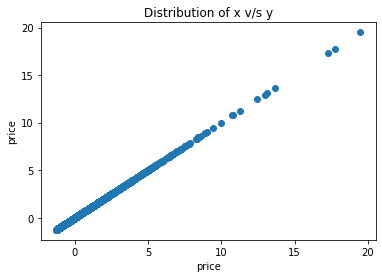

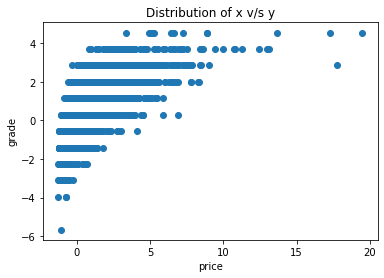

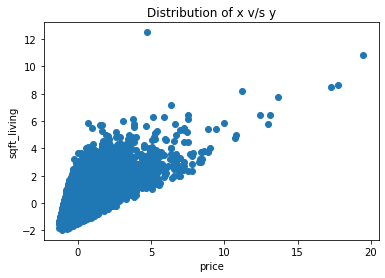

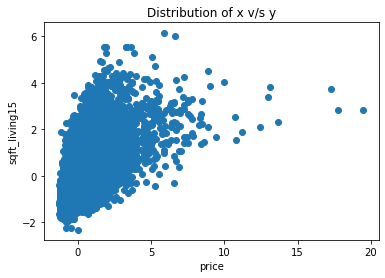

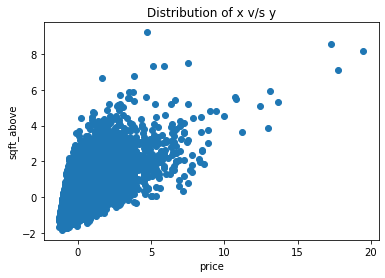

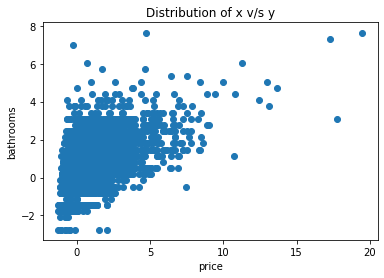

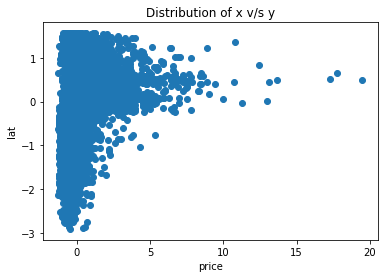

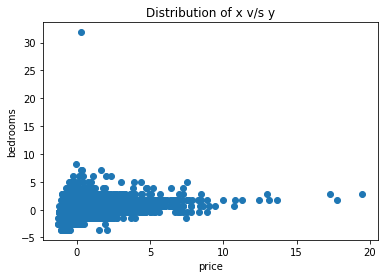

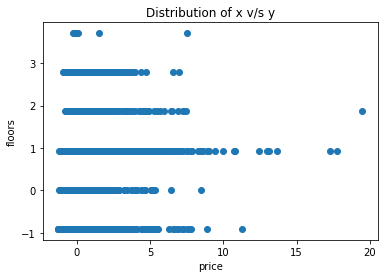

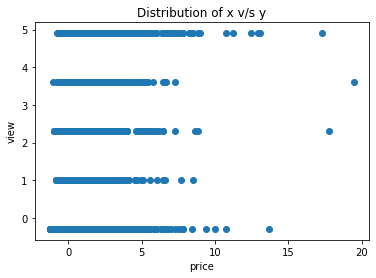

In [14]:
ob_viz.gavy_recommend_plot(
    data_regress,
    response = 'price',
    top_n = 10
)

### Function implements Regression, Naive Bayes, Support Vector Machine

In [15]:
model_assumptions, mse_train, mse_test = ob_modelling.open_regression(
    train_data_regress, 
    test_data_regress, 'price', 
    method = "gradient_descent", 
    alpha = 0.001, 
    iter = 100
)


##############MODELLING MODE ON#############

#############PERFORMANCE GRADIENT DESCENT################

#############TRAINING RESULTS##############

###########################################

Model Report
Mean Squared ERROR on TRAIN SET:0.6756722481435662

#############TESTING RESULTS##############
Mean Squared ERROR on TEST SET:0.5776802240858957



###########################################

#############TRAINING RESULTS##############

###########################################

Model Report
AUC Score (Train): 0.618894
CV Score : Mean - 0.5900987 | Std - 0.04695879 | Min - 0.5128096 | Max - 0.6568078

#### KS and p-val on Train set####
KS: 0.1726332921953726
P value: 3.2379999800882084e-96

#### ROC curve (Train set)####
AUC: 0.6188937409525617


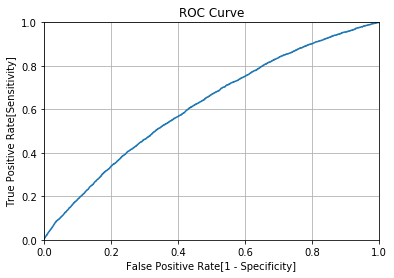


#######################################

#############TEST RESULTS##############

#######################################

Model Report
AUC Score (Test): 0.604285

#### KS and p-val on test set####
KS: 0.16443180497152599
P value: 3.1715524650796018e-21

#### ROC curve (Test set)####
AUC: 0.6042845369710136


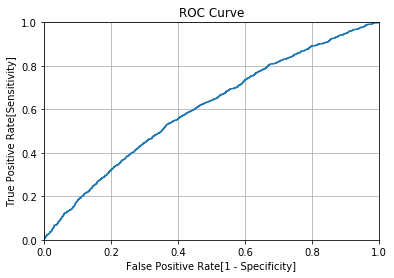

(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=100, probability=True, random_state=29,
     shrinking=True, tol=0.001, verbose=False),
 array([0.08077125, 0.08275937, 0.08063176, ..., 0.07954296, 0.08178645,
        0.07411104]),
 array([0, 1, 0, ..., 0, 1, 0], dtype=int64))

In [16]:
ob_modelling.open_svm(
    train_data,
    'TARGET',
    test_data,
    {'probability': True}
)